<a href="https://colab.research.google.com/github/nowkoai/twnow/blob/main/tw1130.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ‚ë† Twitter„ÅßÊåáÂÆö„Ç≠„Éº„ÉØ„Éº„Éâ„ÅÆÊ§úÁ¥¢ÁµêÊûú„ÇíÂèéÈõÜ

In [408]:
import tweepy
import pandas as pd
import datetime

In [409]:
###########################################################
# Twitter„ÅÆAPI„Ç≠„Éº
CONSUMER_KEY="CONSUMER_KEY„ÇíÂÖ•Âäõ"
CONSUMER_SECRET="CONSUMER_SECRET„ÇíÂÖ•Âäõ"
ACCESS_TOKEN="ACCESS_TOKEN„ÇíÂÖ•Âäõ"
ACCESS_SECRET="ACCESS_SECERET„ÇíÂÖ•Âäõ"
###########################################################


In [410]:
# Twitter API„Ç§„É≥„Çπ„Çø„É≥„Çπ‰ΩúÊàê
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth)

In [411]:
# Twitter„ÅÆÊ§úÁ¥¢„Ç≠„Éº„ÉØ„Éº„ÉâÔºà„É™„ÉÑ„Ç£„Éº„Éà„ÄÅ„É™„Éó„É©„Ç§„ÇíÈô§„ÅèÔºâ
q = f"Ëá™Ê∞ëÂÖö exclude:retweets -filter:replies"

In [412]:
# Tweet„Éá„Éº„Çø„ÇíÊ†ºÁ¥ç„Åô„Çã„É™„Çπ„Éà
tweet_data = []

# Tweet„Éá„Éº„Çø„ÅÆÂèñÂæóÔºàID/„É¶„Éº„Ç∂„ÉºÂêç/‚òÖTweer„Éá„Éº„Çø/Text/„ÅÑ„ÅÑ„Å≠Êï∞/„É™„ÉÑ„Ç£„Éº„ÉàÊï∞Ôºâ
for tweet in tweepy.Cursor(api.search, q=q, result_type='recent',locale="ja",lang="ja",include_entities=False,count=100).items(100):
    tweet_data.append([tweet.id_str,
                       tweet.user.screen_name,
                       tweet.created_at+datetime.timedelta(hours=9),
                       tweet.text.replace('\n',''),
                       tweet.favorite_count,
                       tweet.retweet_count])

In [413]:
# „Ç´„É©„É†„Çí280ÊñáÂ≠óÂπÖ„Å´Ë®≠ÂÆö
pd.set_option("display.max_colwidth", 280)

In [414]:
# „Éá„Éº„ÇøÂàóÂêç
columns_name=["TW_NO","USER_NAME","TW_TIME","TW_TEXT","FAV","RT"]
#„Éá„Éº„Çø„Éï„É¨„Éº„É†Âåñ
df=pd.DataFrame(tweet_data,columns=columns_name)

In [415]:
df

TW_NO        USER_NAME  ... FAV RT
0   1465571987879718912       RYOUMA_MI6  ...   0  0
1   1465571930405486592     onnnakottoso  ...   0  0
2   1465571885127639042      hitomaroaka  ...   0  0
3   1465571787958194178       neibeuqihc  ...   0  0
4   1465571753917239301  TQ2wxOBTRwE9NBG  ...   0  0
..                  ...              ...  ...  .. ..
95  1465568373710868481         akoustam  ...   3  0
96  1465568359760596993          86akita  ...   0  0
97  1465568289027878919  adventure___man  ...   4  0
98  1465568275325095938    yukikobehappy  ...   1  0
99  1465568269075632130    WsPremium2012  ...   0  0

[100 rows x 6 columns]

### ‚ë° Twitter„Éá„Éº„Çø„ÅÆÂâçÂá¶ÁêÜ

In [416]:
!pip install emoji

In [417]:
# ÁµµÊñáÂ≠ó„ÇíÂâäÈô§
import emoji

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)


# „ÉÑ„Ç§„Éº„Éà„ÇíÊï¥ÂΩ¢„Åô„ÇãÔºà‰∏çË¶Å„Å™ÊñáÂ≠ó„ÇíÂâäÈô§„Åô„ÇãÔºÅÔºâ
# ÂΩ¢ÊÖãÁ¥†Ëß£Êûê„Åô„ÇãÂâç„Å´„ÄÅÂøÖË¶Å„Å´Âøú„Åò„Å¶ËøΩË®ò
def format_df_text(text_col,df):
    df['temp'] = df[text_col].replace(r'https?://[w/:%#$&?()~.=+-‚Ä¶]+', '', regex=True) #ÁîªÂÉè„Å∏„ÅÆ„É™„É≥„ÇØ„ÇíÂâäÈô§
    df['temp'] = df['temp'].replace(r'@[w/:%#$&?()~.=+-‚Ä¶]+', '', regex=True) #'@'„Å´„Çà„Çã„É°„É≥„Ç∑„Éß„É≥„ÇíÂâäÈô§
    df['temp'] = df['temp'].replace(r'#(\w+)', '', regex=True) #„Éè„ÉÉ„Ç∑„É•„Çø„Ç∞(ÂçäËßí)„ÇíÂâäÈô§
    df['temp'] = df['temp'].replace(r'ÔºÉ(\w+)', '', regex=True) #„Éè„ÉÉ„Ç∑„É•„Çø„Ç∞(ÂÖ®Ëßí)„ÇíÂâäÈô§
    df['temp'] = df['temp'].apply(lambda x: remove_emoji(x)) #üê∂„ÅÆ„Çà„ÅÜ„Å™ÁµµÊñáÂ≠ó„ÇíÂâäÈô§
    
    return df['temp']

In [418]:
# Tweet„Éá„Éº„Çø„ÅÆÂâçÂá¶ÁêÜ
df['TW_TEXT_mod'] = format_df_text('TW_TEXT',df)

In [419]:
df

TW_NO  ...                                                                                                                TW_TEXT_mod
0   1465571987879718912  ...                                                                                           Ê∞ëÂåªÈÄ£=ÂÖ±Áî£ÂÖöÁ≥ªÁßªÊ∞ëÊîøÁ≠ñÊé®ÈÄ≤„Åß„ÅØËá™Ê∞ëÂÖö„ÇÇÂÖ±Áî£ÂÖö„ÇÇÂà©ÂÆ≥„Åå‰∏ÄËá¥   
1   1465571930405486592  ...  „Ç≤„Ç§„Åø„Çì„Å™„ÅåÂêåÊÄßÂ©ö„ÇíÊúõ„Çì„Åß„Çã„Çè„Åë„Åò„ÇÉ„Å™„ÅÑ‚Üê‰∫ãÂÆü„Ç≤„Ç§„Åø„Çì„Å™„Åå„Ç´„Éü„É≥„Ç∞„Ç¢„Ç¶„Éà„ÇíÊúõ„Çì„Åß„Çã„Çè„Åë„Åò„ÇÉ„Å™„ÅÑ‚Üê‰∫ãÂÆü„Ç≤„Ç§„Å´„ÇÇËá™Ê∞ëÂÖöÊîØÊåÅËÄÖ„ÅØÂ§ö„ÅÑ‚Üê‰∫ãÂÆü‰∫ãÂÆü„Å†„ÅëË®Ä„Å£„Å¶„Çä„ÇÉ„ÅÑ„ÅÑ„ÅÆ„Å´„ÄÅ„Å™„Åú„Å©„ÅÜ„Åó„Å¶„Ç≤„Ç§„É™„Éñ „Ç¢„É≥„ÉÅ„ÅØÂòò„ÇÑÈô∞Ë¨ÄË´ñ„Çí„Å≠„ÅòËæº„Çì„Å†„ÉÑ„Ç§„Éº„Éà„Çí„Åô„Çã„ÅÆ„Å†„Çç„ÅÜ„Åã„ÄÇ„ÄÇ„ÄÇ
2   1465571885127639042  ...                               „Åï„Å¶Êó•Â∏∏„Å´Êàª„Çä„Åæ„Åó„Çá„ÅÜ„ÄÇÁ∂≠Êñ∞„Å®ÁµÑ„ÇÄ  „Å™„Çì„Å¶ÂÆ≥ÊÇ™„Åß„Åó„Åã„Å™„ÅÑ„ÄÇ „ÇÇ‰ø°È†º„Åß„Åç„Å™„Åè„Å™„Å£„Åü‰ªä„ÅØ  „Å®   „Å†„Åë„ÅåÈ†º„Çä„Å†„ÄÇËá™Ê∞ëÂÖö„Å®Á∂≠Êñ∞„Å´ÊäµÊäó„Åô„Çã„Å´„ÅØ„ÄÅÁ§æÊ∞ë„Å®„Çå„ÅÑ„Çè„Åó„Åã„Å™„ÅÑ„ÄÅÂøúÊè¥„Åó„Å¶„ÇÜ„Åç„Åæ„Åô„Çà  
3   1465571787958194178  ...                „ÄåÈÅ∏Êåô„ÅØÊØéÂõûË°å„Åè„ÄÅÊîøÊ≤ª„Éã„É•„Éº„Çπ„ÇÇ„Éò„ÉÉ„Éâ„É©„Ç§„É≥„ÅØ„Å°„ÇÉ„Çì„Å®ËøΩ„Å£„Å¶„ÅÑ„Çã„ÄÅÊîøÊ®©ÂÄí„Çå„Çç„Å®„ÅØÂÖ®„ÅèÊÄù„Çè„Çì„Åå„ÄÅÁ¥∞„Åã„ÅÑ‰∏çÊ∫Ä„ÅØ„ÇÅ„Å£„Å°„ÇÉ„ÅÇ„Çã„ÄÅËá™Ê∞ëÂÖö1Âº∑„ÅØÂæÆÂ¶ô„Å†„Å™„ÅÇ„Äç„Å®„ÅÑ„ÅÜ„É™„ÉÜ„É©„Ç∑„Éº„É¨„Éô„É´„Åß„ÇÇ„ÄÅÁ´ãÊÜ≤Ê∞ë‰∏ªÂÖö„ÅÆÂÖöÈ¶ñÈÅ∏„ÄÅÊ≠ª„Å¨„Åª„Å©„Å©„ÅÜ„Åß„ÇÇ„ÅÑ„ÅÑ„Å™
4   1465571753917239301  ...                 ‰ΩïÊïÖ„ÄåÂä¥ÂÉçÁµÑÂêà„Å´ÈÅé„Åé„Å™„ÅÑÈÄ£Âêà„Äç„Åå„Åì„Åì„Åæ„ÅßÊîøÊ≤ª„Å´Âè£„ÇíÂá∫„Åô„ÅÆ„ÅãÔºü„Å™„Çì„ÅßÈÄ£Âêà„ÅØËá™Ê∞ëÂÖö„ÅÆÂøúÊè¥Âõ£„Å´„Å™„Å£„Åü„ÅÆ„ÅãÔºü‰∏çÊÄùË≠∞„Åß„Åó„Çá„ÅÜ„Å≠„ÄÇÂÖ±Áî£ÂÖö„ÅØË®±„Åï„Å™„ÅÑ„Å®„ÅãË®Ä„ÅÜ„ÅÆ„ÅØÂè£ÂÆü„Åß„ÄÅ„ÄåÂéüÁô∫ÂªÉÊ£Ñ„Äç„Éª„ÄåÂéüÁô∫Ë®±„Åï„Å¨„ÄçVS„ÄÄ„ÄåÂéüÁô∫Êùë„Äç„Éª„ÄåËá™Ê∞ëË≤°‚Ä¶ 
..                  ...  ...                                                                                                                        ...
95  1465568373710868481  ...      „Åì„Çå„ÅßÂÖ±Áî£ÂÖöË∑ØÁ∑ö„ÇíÁõÆÊåá„Åô„Éé„Ç§„Ç∏„Éº„Éû„Ç§„Éé„É™„ÉÜ„Ç£Ê¥æ„ÅØÂàÜË£Ç„Åó„Å¶Âá∫„Å¶Ë°å„Å£„Å¶„ÇÇ„Çâ„ÅÑ„ÄÅ„Çø„Éû„Ç≠„É≥„Å®Âêà‰Ωµ„Åó„Å¶„ÄéÂåóÊ¨ßÂûãÈ´òÁ¶èÁ•âÈ´òË≤†ÊãÖ„ÉªÂåªÁôÇË≤ªÊïôËÇ≤Ë≤ªÁÑ°Êñô„ÉªÊ∂àË≤ªÁ®é 30%„Äè„ÇíÂü∫Êú¨ÊîøÁ≠ñ„Å´„Åó„ÅüÂÖö„Çí‰Ωú„Å£„Å¶„ÄÅ„ÄéÊó•Êú¨Âûã‰∏≠Á¶èÁ•â‰∏≠Ë≤†ÊãÖ„Äè„ÅÆËá™Ê∞ëÂÖö„Å®Â∑ÆÂà•ÂåñÂá∫Êù•„Çå„Å∞„ÄÅÊîøÊ®©„Å´‚Ä¶ 
96  1465568359760596993  ...                                                                         Ëá™Ê∞ëÂÖö„ÅÆ‰∏ä„Å´„Å™„Å£„Å¶„Çã‰∫∫„Å´„Åæ„Å®„ÇÇ„Å™„ÅÆ„ÅØÈ´òÂ∏Ç„Åï„Çì„Åó„Åã„ÅÑ„Å™„ÅÑ„ÅÆ„Åã‚Ä¶„Åæ„ÅòÊôÆÈÄö„Å´ËÄÉ„Åà„Åü„ÇâÁµ∂ÂØæ„Ç¢„Ç´„É≥„Å†„Çç„Å£„Å¶ÊÄí 
97  1465568289027878919  ...            Á´ãÊÜ≤ÂÖ±Áî£ÂÖö„ÅÆÊñ∞ÂÖöÈ¶ñ„Å´Ê≥âÂÅ•Â§™Ê∞è„ÄÇ„Åæ„Å£„Åü„ÅèÊúüÂæÖ„ÇÇ„Å™„Åè„Åü„Å†„Åü„Å†„ÄÅ„Åµ„Éº„Çì„ÄÅ„Å®Ë®Ä„ÅÜÊÑü„Åò„Åß„Åó„Åã„Å™„ÅÑ„ÄÇ„Åæ„Åö„ÅØÂ∞±‰ªª„ÅÆ‰ºöË¶ãÊå®Êã∂„ÅßÊûùÈáéÂâçÂÖöÈ¶ñ„Åå„ÄåÔºàËá™Ê∞ëÂÖö„Å´ÂØæ„Åó„Å¶Ôºâ‰ª£Ë°®ÈÅ∏Êåô„ÅØ17ÊôÇ‰ª•Èôç„Å´„ÇÑ„Å£„Å¶„ÅÑ„Åü„Å†„Åç„Åü„ÅÑ„Äç„Å®Áô∫Ë®Ä„Åó„Å¶„ÅÑ„Åü„Åì„Å®„Å∏„ÅÆ„Éñ„Éº„É°„É©„É≥„Å´‚Ä¶ 
98  1465568275325095938  ...                                                                                              „Äå„Åç„Çå„ÅÑ„Å™Ëá™Ê∞ëÂÖö„ÄçÁöÑÁ´ãÊÜ≤Ê∞ë‰∏ªÂÖö„ÅÆË™ïÁîü„Å£„Å¶„Åì„Å®„ÅßÊ≠ìËøé„Åó„Åæ„Åô„ÄÇ
99  1465568269075632130  ...                                                                         Ê≥â„ÅßÂ§ß‰∏àÂ§´„Åã„Å™„ÅÅ„Äú„ÄÇËá™Ê∞ëÂÖöÂØÑ„Çä„Å´„Å™„Çâ„Å™„Åë„Çå„Å∞„ÅÑ„ÅÑ„Åë„Å©Ôºü„ÄÄÁ´ãÊÜ≤„ÅÆ‰∏≠„Å´„ÅØ„Åæ„Å†ÁÖÆ„ÅàÂàá„Çâ„Å™„ÅÑË≠∞Âì°„ÅåÂ§ö„ÅÑ„ÅÆÔºü 

[100 rows x 8 columns]

### ‚ë¢ Twitter„Éá„Éº„Çø„ÇíGoogle Drive‰∏ä„Å´‰øùÂ≠ò„Åô„Çã

In [420]:
# # Google„Éâ„É©„Ç§„Éñ„Çí„Éû„Ç¶„É≥„Éà
# # ‚òÖÂÆüË°å„Åô„Çã„Å®Ë™çË®ºÁî®„ÅÆURL„ÅåË°®Á§∫„Åï„Çå„Çã ‚Üí „ÇØ„É™„ÉÉ„ÇØ„Åó„Å¶„Ç¢„ÇØ„Çª„ÇπË®±ÂèØ„ÅÆÁ¢∫Ë™ç„Åô„Çã„Å®Ë™çË®ºÁî®„ÅÆ„Ç≥„Éº„Éâ„ÅåË°®Á§∫„Åï„Çå„Çã
# # ‚Üí „Åù„ÅÆË™çË®º„Ç≥„Éº„Éâ„ÇíÁ©∫Ê¨Ñ„ÉÜ„Ç≠„Çπ„Éà„Éú„ÉÉ„ÇØ„Çπ„Å´„Ç≥„Éî„Éº„Åó„Å¶„ÄÅ„É™„Çø„Éº„É≥„ÇíÊäº„Åô„Å®Ë™çË®ºÂÆå‰∫Ü„Åó„Å¶„ÄÅGoogle„Éâ„É©„Ç§„Éñ„Å´„Ç¢„ÇØ„Çª„Çπ„Åß„Åç„Åæ„ÅôÔºÅ
# from google.colab import drive
# drive.mount('/content/drive')

In [421]:
# # „Éá„Éº„Çø„Çí‰øùÂ≠ò„Åô„Çã„Éá„Ç£„É¨„ÇØ„Éà„É™„Å´ÁßªÂãï
# %cd /content/drive/My Drive/Colab Notebooks

In [422]:
# # „Åù„ÅÆ„Éá„Ç£„É¨„ÇØ„Éà„É™„Åß„ÄÅ„Éï„Ç°„Ç§„É´‰∏ÄË¶ß„ÇíË°®Á§∫
# %ls

In [423]:
file_name='tw_all.csv'

# TwitterÂÖ®ÊÉÖÂ†±„ÇíCSV‰øùÂ≠ò
# df.to_csv(file_name,encoding='utf-8-sig',index=False)
df.to_csv(file_name,encoding='utf-8',index=False)

In [424]:
file_name='tw_text_mod.csv'

# Twitter„ÉÜ„Ç≠„Çπ„ÉàÊÉÖÂ†±„ÇíCSV‰øùÂ≠ò
# df['TW_TEXT_mod'].to_csv(file_name,encoding='utf-8-sig',index=False)
df['TW_TEXT_mod'].to_csv(file_name,encoding='utf-8',index=False)

In [425]:
# „Éï„Ç°„Ç§„É´‰øùÂ≠ò„Åò„ÅüÁèæÂú®„Éë„Çπ„ÇíË°®Á§∫
%pwd

'/content'

In [426]:
# ‰øùÂ≠ò„Éï„Ç°„Ç§„É´Âêç„ÇíÁ¢∫Ë™ç --> ‚òÖGoogle„Éâ„É©„Ç§„Éñ„Åß„Éï„Ç°„Ç§„É´„ÅÆ‰∏≠Ë∫´„Çí„ÅîÁ¢∫Ë™ç„Åè„Å†„Åï„ÅÑÔºÅ
%ls

mecab-ipadic-neologd/  sample_data/  tw_all.csv  tw_text_mod.csv


### ‚ë£ Twitter„Éá„Éº„Çø„ÇíÂΩ¢ÊÖãÁ¥†Ëß£Êûê/Mecab

In [427]:
# ÂΩ¢ÊÖãÁ¥†ÂàÜÊûê„É©„Ç§„Éñ„É©„É™„ÉºMeCab „Å® ËæûÊõ∏(mecab-ipadic-NEologd)„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´ 
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null

# „Ç∑„É≥„Éú„É™„ÉÉ„ÇØ„É™„É≥„ÇØ„Å´„Çà„Çã„Ç®„É©„ÉºÂõûÈÅø
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

fatal: destination path 'mecab-ipadic-neologd' already exists and is not an empty directory.
ln: failed to create symbolic link '/usr/local/etc/mecabrc': File exists


In [431]:
# ËæûÊõ∏„ÅÆ„Éë„Çπ„ÅÆÁ¢∫Ë™ç
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd"

/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd


In [432]:
import MeCab

# # Mecab„ÅÆÂãï‰ΩúÁ¢∫Ë™çÔºà--> ÂΩ¢ÊÖãÁ¥†Ëß£Êûê/ÂàÜ„Åã„Å°Êõ∏„ÅçÁ¢∫Ë™çÔºâ
# # NeologdÊñ∞Ë™ûËæûÊõ∏„Åß„ÄÅ„ÄåÈ¨ºÊªÖ„ÅÆÂàÉ„Äç„ÅåË™çË≠ò„Åï„Çå„Å¶„ÇãÔºÅ
# m = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
# sample_txt = "È¨ºÊªÖ„ÅÆÂàÉ„Çí„Åø„Å™„Åå„Çâ„ÄÅÁßÅ„ÅØPython„Åß„Éó„É≠„Ç∞„É©„Éü„É≥„Ç∞„Çí„Åó„Åæ„Åô"
# print("Mecab:\n", m.parse(sample_txt))

In [433]:
# CSV„Éï„Ç°„Ç§„É´Ë™≠„ÅøËæº„ÅøÔºàTwitter„ÉÜ„Ç≠„Çπ„Éà„Éá„Éº„Çø„ÇíË™≠„ÅøËæº„ÅøÔºÅÔºâ
file_name='tw_text_mod.csv'
df_tw = pd.read_csv(file_name)

In [434]:
# Pandas„Çí„É™„Çπ„ÉàÂåñ
tw_data = df_tw['TW_TEXT_mod'].to_list()

In [435]:
# Mecab„ÅßÂΩ¢ÊÖãÁ¥†Ëß£Êûê„Åô„ÇãÊñáÊõ∏„ÅÆÁ¢∫Ë™ç
tw_data

['Ê∞ëÂåªÈÄ£=ÂÖ±Áî£ÂÖöÁ≥ªÁßªÊ∞ëÊîøÁ≠ñÊé®ÈÄ≤„Åß„ÅØËá™Ê∞ëÂÖö„ÇÇÂÖ±Áî£ÂÖö„ÇÇÂà©ÂÆ≥„Åå‰∏ÄËá¥   ',
 '„Ç≤„Ç§„Åø„Çì„Å™„ÅåÂêåÊÄßÂ©ö„ÇíÊúõ„Çì„Åß„Çã„Çè„Åë„Åò„ÇÉ„Å™„ÅÑ‚Üê‰∫ãÂÆü„Ç≤„Ç§„Åø„Çì„Å™„Åå„Ç´„Éü„É≥„Ç∞„Ç¢„Ç¶„Éà„ÇíÊúõ„Çì„Åß„Çã„Çè„Åë„Åò„ÇÉ„Å™„ÅÑ‚Üê‰∫ãÂÆü„Ç≤„Ç§„Å´„ÇÇËá™Ê∞ëÂÖöÊîØÊåÅËÄÖ„ÅØÂ§ö„ÅÑ‚Üê‰∫ãÂÆü‰∫ãÂÆü„Å†„ÅëË®Ä„Å£„Å¶„Çä„ÇÉ„ÅÑ„ÅÑ„ÅÆ„Å´„ÄÅ„Å™„Åú„Å©„ÅÜ„Åó„Å¶„Ç≤„Ç§„É™„Éñ „Ç¢„É≥„ÉÅ„ÅØÂòò„ÇÑÈô∞Ë¨ÄË´ñ„Çí„Å≠„ÅòËæº„Çì„Å†„ÉÑ„Ç§„Éº„Éà„Çí„Åô„Çã„ÅÆ„Å†„Çç„ÅÜ„Åã„ÄÇ„ÄÇ„ÄÇ',
 '„Åï„Å¶Êó•Â∏∏„Å´Êàª„Çä„Åæ„Åó„Çá„ÅÜ„ÄÇÁ∂≠Êñ∞„Å®ÁµÑ„ÇÄ  „Å™„Çì„Å¶ÂÆ≥ÊÇ™„Åß„Åó„Åã„Å™„ÅÑ„ÄÇ „ÇÇ‰ø°È†º„Åß„Åç„Å™„Åè„Å™„Å£„Åü‰ªä„ÅØ  „Å®   „Å†„Åë„ÅåÈ†º„Çä„Å†„ÄÇËá™Ê∞ëÂÖö„Å®Á∂≠Êñ∞„Å´ÊäµÊäó„Åô„Çã„Å´„ÅØ„ÄÅÁ§æÊ∞ë„Å®„Çå„ÅÑ„Çè„Åó„Åã„Å™„ÅÑ„ÄÅÂøúÊè¥„Åó„Å¶„ÇÜ„Åç„Åæ„Åô„Çà  ',
 '„ÄåÈÅ∏Êåô„ÅØÊØéÂõûË°å„Åè„ÄÅÊîøÊ≤ª„Éã„É•„Éº„Çπ„ÇÇ„Éò„ÉÉ„Éâ„É©„Ç§„É≥„ÅØ„Å°„ÇÉ„Çì„Å®ËøΩ„Å£„Å¶„ÅÑ„Çã„ÄÅÊîøÊ®©ÂÄí„Çå„Çç„Å®„ÅØÂÖ®„ÅèÊÄù„Çè„Çì„Åå„ÄÅÁ¥∞„Åã„ÅÑ‰∏çÊ∫Ä„ÅØ„ÇÅ„Å£„Å°„ÇÉ„ÅÇ„Çã„ÄÅËá™Ê∞ëÂÖö1Âº∑„ÅØÂæÆÂ¶ô„Å†„Å™„ÅÇ„Äç„Å®„ÅÑ„ÅÜ„É™„ÉÜ„É©„Ç∑„Éº„É¨„Éô„É´„Åß„ÇÇ„ÄÅÁ´ãÊÜ≤Ê∞ë‰∏ªÂÖö„ÅÆÂÖöÈ

In [436]:
# Mecab„Çí‰ΩøÁî®„Åó„Å¶„ÄÅÂΩ¢ÊÖãÁ¥†Ëß£Êûê
# ÂΩ¢ÊÖãÁ¥†Ëß£ÊûêÂô®: ChaSen„ÄÅËæûÊõ∏: Êñ∞Ë™ûÂØæÂøú„ÅßÊúâÂêç„Å™Neologd
# mecab = MeCab.Tagger("-Ochasen")
mecab =MeCab.Tagger('-Ochasen -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')

In [437]:
# ÊñáÂçò‰Ωç„ÅÆÂêçË©û„É™„Çπ„Éà
words_list=[]

# ÊñáÂçò‰Ωç„ÅÆÂêçË©û„É™„Çπ„Éà„ÇíÁîüÊàê
for sentence in tw_data:
    # print(mecab.parse(sentence))
    # print(mecab.parse(sentence).splitlines())

    sw_list = []
    for v in mecab.parse(sentence).splitlines():
        # print(v.split())
        if (len(v.split())>=3 and v.split()[3][:2]=='ÂêçË©û'):
            sw_list.append(v.split()[2])
            # print(sw_list)
            
    words_list.append(sw_list)

In [439]:
# ÂΩ¢ÊÖãÁ¥†Ëß£Êûê„ÅÆÁµêÊûú„Å®„Åó„Å¶„ÄÅÂèñÂæó„Åó„Åü„ÄåÊñáÂçò‰Ωç„ÅÆÂêçË©û„É™„Çπ„Éà„Äç„ÇíÁ¢∫Ë™ç
print(words_list)

[['Ê∞ëÂåªÈÄ£', 'ÂÖ±Áî£ÂÖöÁ≥ª', 'ÁßªÊ∞ëÊîøÁ≠ñ', 'Êé®ÈÄ≤', 'Ëá™Ê∞ëÂÖö', 'ÂÖ±Áî£ÂÖö', 'Âà©ÂÆ≥', '‰∏ÄËá¥'], ['„Ç≤„Ç§', '„Åø„Çì„Å™', 'ÂêåÊÄßÂ©ö', '„Çè„Åë', '‰∫ãÂÆü', '„Ç≤„Ç§', '„Åø„Çì„Å™', '„Ç´„Éü„É≥„Ç∞„Ç¢„Ç¶„Éà', '„Çè„Åë', '‰∫ãÂÆü', '„Ç≤„Ç§', 'Ëá™Ê∞ëÂÖöÊîØÊåÅ', 'ËÄÖ', '‰∫ãÂÆü', '‰∫ãÂÆü', '„Ç≤„Ç§„É™„Éñ', '„Ç¢„É≥„ÉÅ', 'Âòò', 'Èô∞Ë¨Ä', 'Ë´ñ', 'tweet', '„ÅÆ'], ['Êó•Â∏∏', 'Á∂≠Êñ∞', 'ÂÆ≥ÊÇ™', '‰ø°È†º', '‰ªä', 'È†º„Çä', 'Ëá™Ê∞ëÂÖö', 'Á∂≠Êñ∞', 'ÊäµÊäó', 'Á§æÊ∞ë', '‰æãË©±', 'ÂøúÊè¥'], ['ÈÅ∏Êåô', 'ÊØéÂõû', 'ÊîøÊ≤ª', '„Éã„É•„Éº„Çπ', 'headline', 'ÊîøÊ®©', '‰∏çÊ∫Ä', 'Ëá™Ê∞ëÂÖö', '1', 'Âº∑', 'ÂæÆÂ¶ô', '„É™„ÉÜ„É©„Ç∑„Éº', '„É¨„Éô„É´', 'Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 'ÂÖöÈ¶ñ', 'ÈÅ∏'], ['Âä¥ÂÉçÁµÑÂêà', 'ÈÄ£Âêà', '„Åì„Åì', 'ÊîøÊ≤ª', 'Âè£', '„ÅÆ', '„Å™„Çì', 'ÈÄ£Âêà', 'Ëá™Ê∞ëÂÖö', 'ÂøúÊè¥Âõ£', '„ÅÆ', '‰∏çÊÄùË≠∞', 'ÂÖ±Áî£ÂÖö', '„ÅÆ', 'Âè£ÂÆü', 'ÂéüÁô∫', 'ÂªÉÊ£Ñ', 'ÂéüÁô∫', 'VS', 'ÂéüÁô∫', 'Êùë', 'Ëá™Ê∞ë', 'Ë≤°'], ['Ëá™Ê∞ëÂÖö', 'ÁµÑ', 'Èô∞'], ['Ëá™Ê∞ëÂÖö', '„Å®„Åì„Çç', '„Éí„Éº„É≠„Éº', 'ÊÇ™ÂΩπ', '„Åì„Å®', 'Ë°®', '„Éí„Éº„É≠„Éº

In [440]:
# „ÄåÊñáÂçò‰Ωç„ÅÆÂêçË©û„É™„Çπ„Éà„Äç„ÅÆÂπ≥Âù¶Âåñ
words_list_flat = []

for u in words_list:
    words_list_flat.extend(u)

In [441]:
print(words_list_flat)

['Ê∞ëÂåªÈÄ£', 'ÂÖ±Áî£ÂÖöÁ≥ª', 'ÁßªÊ∞ëÊîøÁ≠ñ', 'Êé®ÈÄ≤', 'Ëá™Ê∞ëÂÖö', 'ÂÖ±Áî£ÂÖö', 'Âà©ÂÆ≥', '‰∏ÄËá¥', '„Ç≤„Ç§', '„Åø„Çì„Å™', 'ÂêåÊÄßÂ©ö', '„Çè„Åë', '‰∫ãÂÆü', '„Ç≤„Ç§', '„Åø„Çì„Å™', '„Ç´„Éü„É≥„Ç∞„Ç¢„Ç¶„Éà', '„Çè„Åë', '‰∫ãÂÆü', '„Ç≤„Ç§', 'Ëá™Ê∞ëÂÖöÊîØÊåÅ', 'ËÄÖ', '‰∫ãÂÆü', '‰∫ãÂÆü', '„Ç≤„Ç§„É™„Éñ', '„Ç¢„É≥„ÉÅ', 'Âòò', 'Èô∞Ë¨Ä', 'Ë´ñ', 'tweet', '„ÅÆ', 'Êó•Â∏∏', 'Á∂≠Êñ∞', 'ÂÆ≥ÊÇ™', '‰ø°È†º', '‰ªä', 'È†º„Çä', 'Ëá™Ê∞ëÂÖö', 'Á∂≠Êñ∞', 'ÊäµÊäó', 'Á§æÊ∞ë', '‰æãË©±', 'ÂøúÊè¥', 'ÈÅ∏Êåô', 'ÊØéÂõû', 'ÊîøÊ≤ª', '„Éã„É•„Éº„Çπ', 'headline', 'ÊîøÊ®©', '‰∏çÊ∫Ä', 'Ëá™Ê∞ëÂÖö', '1', 'Âº∑', 'ÂæÆÂ¶ô', '„É™„ÉÜ„É©„Ç∑„Éº', '„É¨„Éô„É´', 'Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 'ÂÖöÈ¶ñ', 'ÈÅ∏', 'Âä¥ÂÉçÁµÑÂêà', 'ÈÄ£Âêà', '„Åì„Åì', 'ÊîøÊ≤ª', 'Âè£', '„ÅÆ', '„Å™„Çì', 'ÈÄ£Âêà', 'Ëá™Ê∞ëÂÖö', 'ÂøúÊè¥Âõ£', '„ÅÆ', '‰∏çÊÄùË≠∞', 'ÂÖ±Áî£ÂÖö', '„ÅÆ', 'Âè£ÂÆü', 'ÂéüÁô∫', 'ÂªÉÊ£Ñ', 'ÂéüÁô∫', 'VS', 'ÂéüÁô∫', 'Êùë', 'Ëá™Ê∞ë', 'Ë≤°', 'Ëá™Ê∞ëÂÖö', 'ÁµÑ', 'Èô∞', 'Ëá™Ê∞ëÂÖö', '„Å®„Åì„Çç', '„Éí„Éº„É≠„Éº', 'ÊÇ™ÂΩπ', '„Åì„Å®', 'Ë°®', '„Éí„Éº„É≠„Éº', '„É°„Éá„Ç£

### ‚ë§ „ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„ÅÆË°®Á§∫

In [442]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [443]:
# „ÉØ„Éº„Éâ„ÅÆ„É™„Çπ„Éà„Çí„Çπ„Éö„Éº„ÇπÂå∫Âàá„Çä„ÅßÈÄ£Áµê
words_text = " ".join(words_list_flat)
words_text

'Ê∞ëÂåªÈÄ£ ÂÖ±Áî£ÂÖöÁ≥ª ÁßªÊ∞ëÊîøÁ≠ñ Êé®ÈÄ≤ Ëá™Ê∞ëÂÖö ÂÖ±Áî£ÂÖö Âà©ÂÆ≥ ‰∏ÄËá¥ „Ç≤„Ç§ „Åø„Çì„Å™ ÂêåÊÄßÂ©ö „Çè„Åë ‰∫ãÂÆü „Ç≤„Ç§ „Åø„Çì„Å™ „Ç´„Éü„É≥„Ç∞„Ç¢„Ç¶„Éà „Çè„Åë ‰∫ãÂÆü „Ç≤„Ç§ Ëá™Ê∞ëÂÖöÊîØÊåÅ ËÄÖ ‰∫ãÂÆü ‰∫ãÂÆü „Ç≤„Ç§„É™„Éñ „Ç¢„É≥„ÉÅ Âòò Èô∞Ë¨Ä Ë´ñ tweet „ÅÆ Êó•Â∏∏ Á∂≠Êñ∞ ÂÆ≥ÊÇ™ ‰ø°È†º ‰ªä È†º„Çä Ëá™Ê∞ëÂÖö Á∂≠Êñ∞ ÊäµÊäó Á§æÊ∞ë ‰æãË©± ÂøúÊè¥ ÈÅ∏Êåô ÊØéÂõû ÊîøÊ≤ª „Éã„É•„Éº„Çπ headline ÊîøÊ®© ‰∏çÊ∫Ä Ëá™Ê∞ëÂÖö 1 Âº∑ ÂæÆÂ¶ô „É™„ÉÜ„É©„Ç∑„Éº „É¨„Éô„É´ Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö ÂÖöÈ¶ñ ÈÅ∏ Âä¥ÂÉçÁµÑÂêà ÈÄ£Âêà „Åì„Åì ÊîøÊ≤ª Âè£ „ÅÆ „Å™„Çì ÈÄ£Âêà Ëá™Ê∞ëÂÖö ÂøúÊè¥Âõ£ „ÅÆ ‰∏çÊÄùË≠∞ ÂÖ±Áî£ÂÖö „ÅÆ Âè£ÂÆü ÂéüÁô∫ ÂªÉÊ£Ñ ÂéüÁô∫ VS ÂéüÁô∫ Êùë Ëá™Ê∞ë Ë≤° Ëá™Ê∞ëÂÖö ÁµÑ Èô∞ Ëá™Ê∞ëÂÖö „Å®„Åì„Çç „Éí„Éº„É≠„Éº ÊÇ™ÂΩπ „Åì„Å® Ë°® „Éí„Éº„É≠„Éº „É°„Éá„Ç£„Ç¢ Èú≤Âá∫ ‰∏ÄÊûöÂ≤© ÁöÑ ÊÑü„Åò ÂõΩÊ∞ë ÊúüÂæÖ Ë£è ÊÇ™ÂΩπ ÊÇ™Â∑ß„Åø Êòî ‰∫∫Áîü „Ç≤„Éº„É† „Åø„Åü„ÅÑ „ÇÇ„ÅÆ Ëá™Ê∞ëÂÖö Ê†πÊú¨ÁöÑ „ÅÆ ÊÆãÂøµ ‰∫ãÂÆü „Éº Â•¥Èö∑ ÈÄ£Èéñ Á§æÁïú Â∫∂Ê∞ë Ê¥óËÑ≥ ÊïôËÇ≤ „Åì„Å® ÁîüÊ¥ª‰øùË≠∑ ÊôÇÈñì ÊÑèË≠ò Êñπ Á´ãÊÜ≤ „Å®„Åì„Çç ÈÅ∏Êåô ÂéüÂõ† Â∑ùÂãù ÁúåÁü•‰∫ã

In [444]:
# Êó•Êú¨Ë™û„ÅÆ True Font „ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


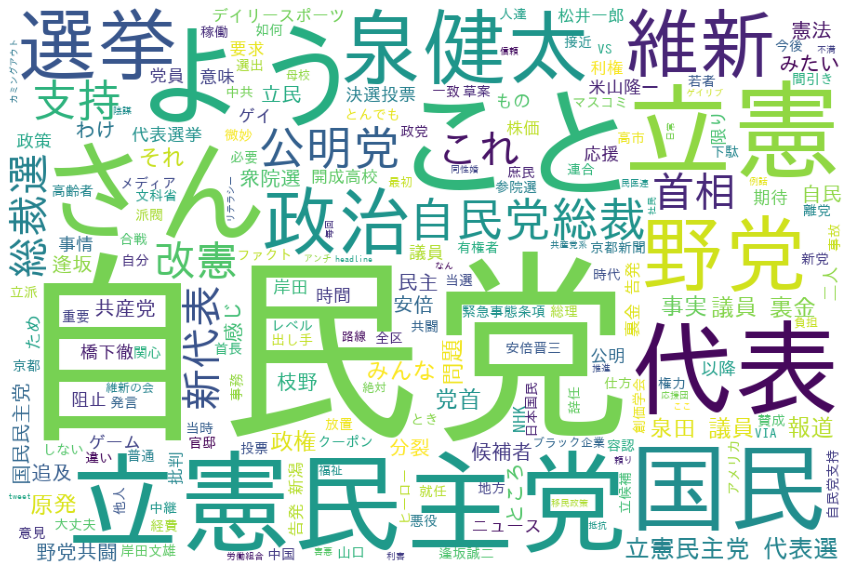

In [445]:
# WordCloud„ÅßÂá∫Âäõ„Åô„Çã„Éï„Ç©„É≥„Éà„ÇíÊåáÂÆö
font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"

# „Çπ„Éà„ÉÉ„Éó„ÉØ„Éº„Éâ„ÅÆË®≠ÂÆö„ÄÄ‚Äª„Åì„Çå„ÅØÊ§úÁ¥¢„Ç≠„Éº„ÉØ„Éº„Éâ„Å´„Çà„Å£„Å¶Èô§Â§ñ„Åó„Åü„Åª„ÅÜ„Åå„ÅÑ„ÅÑÂçòË™û„ÇíË®≠ÂÆö
stop_words = [ 'https','OracleInnovation' ,'Innovation','Oracle','co','the','of','Summit','Tokyo','Japan','RT',u'Ë™¨Êòé',u'„Éá„Éº„Çø',u'„Åô„Çã',u'„Ç™„É©„ÇØ„É´',u'Êó•Êú¨',u'Êèê‰æõ',u'ÈñãÂÇ¨',u'„ÅäÂÆ¢Êßò']

#Ëß£ÊûêÂçòË™û„ÅÆÊåáÂÆö„ÄÅ„Çπ„Éà„ÉÉ„Éó„ÉØ„Éº„Éâ„ÅÆË®≠ÂÆö„ÄÅËÉåÊôØËâ≤„ÅØÁôΩ
wordcloud = WordCloud(background_color="white", font_path=font_path, stopwords=set(stop_words),width=900,height=600).generate(words_text)

# „ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„ÇíË°®Á§∫
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### ‚ë• „ÉØ„Éº„Éâ„Ç´„Ç¶„É≥„ÉàÔºà„Çπ„Éà„ÉÉ„Éó„ÉØ„Éº„Éâ„ÅÆ„ÉÅ„Çß„ÉÉ„ÇØÔºâ

In [446]:
from collections import Counter

In [447]:
# Counter„ÅÆÂºïÊï∞„ÅØ„É™„Çπ„Éà„ÇíÊåáÂÆöÔºÅ
print(words_list_flat)

['Ê∞ëÂåªÈÄ£', 'ÂÖ±Áî£ÂÖöÁ≥ª', 'ÁßªÊ∞ëÊîøÁ≠ñ', 'Êé®ÈÄ≤', 'Ëá™Ê∞ëÂÖö', 'ÂÖ±Áî£ÂÖö', 'Âà©ÂÆ≥', '‰∏ÄËá¥', '„Ç≤„Ç§', '„Åø„Çì„Å™', 'ÂêåÊÄßÂ©ö', '„Çè„Åë', '‰∫ãÂÆü', '„Ç≤„Ç§', '„Åø„Çì„Å™', '„Ç´„Éü„É≥„Ç∞„Ç¢„Ç¶„Éà', '„Çè„Åë', '‰∫ãÂÆü', '„Ç≤„Ç§', 'Ëá™Ê∞ëÂÖöÊîØÊåÅ', 'ËÄÖ', '‰∫ãÂÆü', '‰∫ãÂÆü', '„Ç≤„Ç§„É™„Éñ', '„Ç¢„É≥„ÉÅ', 'Âòò', 'Èô∞Ë¨Ä', 'Ë´ñ', 'tweet', '„ÅÆ', 'Êó•Â∏∏', 'Á∂≠Êñ∞', 'ÂÆ≥ÊÇ™', '‰ø°È†º', '‰ªä', 'È†º„Çä', 'Ëá™Ê∞ëÂÖö', 'Á∂≠Êñ∞', 'ÊäµÊäó', 'Á§æÊ∞ë', '‰æãË©±', 'ÂøúÊè¥', 'ÈÅ∏Êåô', 'ÊØéÂõû', 'ÊîøÊ≤ª', '„Éã„É•„Éº„Çπ', 'headline', 'ÊîøÊ®©', '‰∏çÊ∫Ä', 'Ëá™Ê∞ëÂÖö', '1', 'Âº∑', 'ÂæÆÂ¶ô', '„É™„ÉÜ„É©„Ç∑„Éº', '„É¨„Éô„É´', 'Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 'ÂÖöÈ¶ñ', 'ÈÅ∏', 'Âä¥ÂÉçÁµÑÂêà', 'ÈÄ£Âêà', '„Åì„Åì', 'ÊîøÊ≤ª', 'Âè£', '„ÅÆ', '„Å™„Çì', 'ÈÄ£Âêà', 'Ëá™Ê∞ëÂÖö', 'ÂøúÊè¥Âõ£', '„ÅÆ', '‰∏çÊÄùË≠∞', 'ÂÖ±Áî£ÂÖö', '„ÅÆ', 'Âè£ÂÆü', 'ÂéüÁô∫', 'ÂªÉÊ£Ñ', 'ÂéüÁô∫', 'VS', 'ÂéüÁô∫', 'Êùë', 'Ëá™Ê∞ë', 'Ë≤°', 'Ëá™Ê∞ëÂÖö', 'ÁµÑ', 'Èô∞', 'Ëá™Ê∞ëÂÖö', '„Å®„Åì„Çç', '„Éí„Éº„É≠„Éº', 'ÊÇ™ÂΩπ', '„Åì„Å®', 'Ë°®', '„Éí„Éº„É≠„Éº', '„É°„Éá„Ç£

In [448]:
# ÂêÑ„ÉØ„Éº„Éâ„ÅÆÂá∫Áèæ„Ç´„Ç¶„É≥„Éà„ÅÆÊï∞ÂÄ§Âá∫Âäõ(„Ç´„É≥„ÉûÂå∫Âàá„Çä)
counter = Counter(words_list_flat)
print(counter)

Counter({'Ëá™Ê∞ëÂÖö': 86, '„ÅÆ': 39, 'Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö': 20, '„Åì„Å®': 18, 'Ê∞è': 18, '„Åï„Çì': 15, '„Çà„ÅÜ': 15, 'Á´ãÊÜ≤': 13, 'Ë≠∞Âì°': 13, '‰ª£Ë°®': 12, 'ÂõΩÊ∞ë': 11, 'Ê≥âÂÅ•Â§™': 10, 'ÈáéÂÖö': 10, 'ÈÅ∏Êåô': 9, 'ÈÅ∏': 9, 'Ê≥â': 9, 'Á∂≠Êñ∞': 8, 'ÊîøÊ≤ª': 8, 'Êñπ': 8, 'Ëá™Ê∞ëÂÖöÁ∑èË£Å': 8, 'ÂÖ¨ÊòéÂÖö': 8, 'ÁöÑ': 7, '„Çì': 7, '‰ª£Ë°®ÈÅ∏': 7, 'ÊîØÊåÅ': 7, '‰∫∫': 7, 'ÊîπÊÜ≤': 6, 'Êñ∞‰ª£Ë°®': 6, 'Á∑èË£ÅÈÅ∏': 6, '„Åì„Çå': 6, 'È¶ñÁõ∏': 6, '‰Ωï': 6, 'Ë£èÈáë': 6, '„Åø„Çì„Å™': 5, '‰∫ãÂÆü': 5, 'ÊîøÊ®©': 5, 'ÂÖöÈ¶ñ': 5, 'ÂéüÁô∫': 5, '‰∏≠': 5, 'Ë™∞': 5, 'Êó•Êú¨': 5, '„Åù„Çå': 5, 'Â†±ÈÅì': 5, '‰∏á': 5, 'ÂïèÈ°å': 5, '„Åï': 5, 'Ôºí': 5, 'Ê≥âÁî∞': 5, 'ÂÖ±Áî£ÂÖö': 4, '„Çè„Åë': 4, 'ËÄÖ': 4, 'Ëá™Ê∞ë': 4, '„Å®„Åì„Çç': 4, 'ÊÑü„Åò': 4, '„Åø„Åü„ÅÑ': 4, 'Ê∞ë‰∏ª': 4, 'ÂÄôË£úËÄÖ': 4, 'ÂÖö': 4, 'ÂÆâÂÄç': 4, 'Ê¥æ': 4, 'Á´ãÊ∞ë': 4, 'ÈÄ¢ÂùÇ': 4, 'ÊÜ≤Ê≥ï': 4, 'ÈáéÂÖöÂÖ±Èóò': 4, 'ÂàÜË£Ç': 4, 'ÂõΩ': 4, 'ÂõΩÊ∞ëÊ∞ë‰∏ªÂÖö': 4, 'ÊôÇ': 4, 'Ë°ÜÈô¢ÈÅ∏': 4, 'ÂçÉ': 4, 'Ôºï': 4, 'ÂÜÖ': 4, 'Á•®': 4, '‰∫ã': 4, 'ÊûùÈáé': 4, 'ËøΩÂè

In [451]:
# Êï∞ÂÄ§„ÇíÈôçÈ†Ü„Å´„Åó„Å¶„ÄÅ„ÉØ„Éº„Éâ„ÅÆ‰∏ä‰Ωç„É©„É≥„Ç≠„É≥„Ç∞„ÇíÊï∞ÂÄ§„Åß„ÇÇ„Åø„Å¶„Åø„Çã
print(sorted(counter.items(), key=lambda x:x[1], reverse=True))

[('Ëá™Ê∞ëÂÖö', 86), ('„ÅÆ', 39), ('Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 20), ('„Åì„Å®', 18), ('Ê∞è', 18), ('„Åï„Çì', 15), ('„Çà„ÅÜ', 15), ('Á´ãÊÜ≤', 13), ('Ë≠∞Âì°', 13), ('‰ª£Ë°®', 12), ('ÂõΩÊ∞ë', 11), ('Ê≥âÂÅ•Â§™', 10), ('ÈáéÂÖö', 10), ('ÈÅ∏Êåô', 9), ('ÈÅ∏', 9), ('Ê≥â', 9), ('Á∂≠Êñ∞', 8), ('ÊîøÊ≤ª', 8), ('Êñπ', 8), ('Ëá™Ê∞ëÂÖöÁ∑èË£Å', 8), ('ÂÖ¨ÊòéÂÖö', 8), ('ÁöÑ', 7), ('„Çì', 7), ('‰ª£Ë°®ÈÅ∏', 7), ('ÊîØÊåÅ', 7), ('‰∫∫', 7), ('ÊîπÊÜ≤', 6), ('Êñ∞‰ª£Ë°®', 6), ('Á∑èË£ÅÈÅ∏', 6), ('„Åì„Çå', 6), ('È¶ñÁõ∏', 6), ('‰Ωï', 6), ('Ë£èÈáë', 6), ('„Åø„Çì„Å™', 5), ('‰∫ãÂÆü', 5), ('ÊîøÊ®©', 5), ('ÂÖöÈ¶ñ', 5), ('ÂéüÁô∫', 5), ('‰∏≠', 5), ('Ë™∞', 5), ('Êó•Êú¨', 5), ('„Åù„Çå', 5), ('Â†±ÈÅì', 5), ('‰∏á', 5), ('ÂïèÈ°å', 5), ('„Åï', 5), ('Ôºí', 5), ('Ê≥âÁî∞', 5), ('ÂÖ±Áî£ÂÖö', 4), ('„Çè„Åë', 4), ('ËÄÖ', 4), ('Ëá™Ê∞ë', 4), ('„Å®„Åì„Çç', 4), ('ÊÑü„Åò', 4), ('„Åø„Åü„ÅÑ', 4), ('Ê∞ë‰∏ª', 4), ('ÂÄôË£úËÄÖ', 4), ('ÂÖö', 4), ('ÂÆâÂÄç', 4), ('Ê¥æ', 4), ('Á´ãÊ∞ë', 4), ('ÈÄ¢ÂùÇ', 4), ('ÊÜ≤Ê≥ï', 4), ('ÈáéÂÖöÂÖ±Èóò', 4), ('ÂàÜË£Ç', 4), ('ÂõΩ

In [452]:
# ÈÅ©„Åï„Å™„ÅÑÂçòË™û„Çí„É™„Çπ„Éà„Åã„Çâ„Ç´„ÉÉ„ÉàÔºàNG„ÉØ„Éº„Éâ„ÅÆÈßÜÈÄêÔºâ
words_list_flat2 = []
for w in words_list_flat:
    if w not in ['„ÅÆ', '„Çì', '„Åì„Çå', '„Åï„Çì']:
        words_list_flat2.append(w)

In [453]:
# ÂêÑ„ÉØ„Éº„Éâ„ÅÆÂá∫Áèæ„Ç´„Ç¶„É≥„Éà„ÅÆÊï∞ÂÄ§Âá∫Âäõ(„Ç´„É≥„ÉûÂå∫Âàá„Çä)
#--> NG„ÉØ„Éº„Éâ„ÅÆÈßÜÈÄêÂæå
counter2 = Counter(words_list_flat2)
print(sorted(counter2.items(), key=lambda x:x[1], reverse=True))

[('Ëá™Ê∞ëÂÖö', 86), ('Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 20), ('„Åì„Å®', 18), ('Ê∞è', 18), ('„Çà„ÅÜ', 15), ('Á´ãÊÜ≤', 13), ('Ë≠∞Âì°', 13), ('‰ª£Ë°®', 12), ('ÂõΩÊ∞ë', 11), ('Ê≥âÂÅ•Â§™', 10), ('ÈáéÂÖö', 10), ('ÈÅ∏Êåô', 9), ('ÈÅ∏', 9), ('Ê≥â', 9), ('Á∂≠Êñ∞', 8), ('ÊîøÊ≤ª', 8), ('Êñπ', 8), ('Ëá™Ê∞ëÂÖöÁ∑èË£Å', 8), ('ÂÖ¨ÊòéÂÖö', 8), ('ÁöÑ', 7), ('‰ª£Ë°®ÈÅ∏', 7), ('ÊîØÊåÅ', 7), ('‰∫∫', 7), ('ÊîπÊÜ≤', 6), ('Êñ∞‰ª£Ë°®', 6), ('Á∑èË£ÅÈÅ∏', 6), ('È¶ñÁõ∏', 6), ('‰Ωï', 6), ('Ë£èÈáë', 6), ('„Åø„Çì„Å™', 5), ('‰∫ãÂÆü', 5), ('ÊîøÊ®©', 5), ('ÂÖöÈ¶ñ', 5), ('ÂéüÁô∫', 5), ('‰∏≠', 5), ('Ë™∞', 5), ('Êó•Êú¨', 5), ('„Åù„Çå', 5), ('Â†±ÈÅì', 5), ('‰∏á', 5), ('ÂïèÈ°å', 5), ('„Åï', 5), ('Ôºí', 5), ('Ê≥âÁî∞', 5), ('ÂÖ±Áî£ÂÖö', 4), ('„Çè„Åë', 4), ('ËÄÖ', 4), ('Ëá™Ê∞ë', 4), ('„Å®„Åì„Çç', 4), ('ÊÑü„Åò', 4), ('„Åø„Åü„ÅÑ', 4), ('Ê∞ë‰∏ª', 4), ('ÂÄôË£úËÄÖ', 4), ('ÂÖö', 4), ('ÂÆâÂÄç', 4), ('Ê¥æ', 4), ('Á´ãÊ∞ë', 4), ('ÈÄ¢ÂùÇ', 4), ('ÊÜ≤Ê≥ï', 4), ('ÈáéÂÖöÂÖ±Èóò', 4), ('ÂàÜË£Ç', 4), ('ÂõΩ', 4), ('ÂõΩÊ∞ëÊ∞ë‰∏ªÂÖö', 4), ('ÊôÇ', 4), ('Ë°ÜÈô¢ÈÅ∏',

In [454]:
# „ÉØ„Éº„Éâ„ÅÆ„É™„Çπ„Éà„Çí„Çπ„Éö„Éº„ÇπÂå∫Âàá„Çä„ÅßÈÄ£Áµê
words_text2 = " ".join(words_list_flat2)
words_text2

'Ê∞ëÂåªÈÄ£ ÂÖ±Áî£ÂÖöÁ≥ª ÁßªÊ∞ëÊîøÁ≠ñ Êé®ÈÄ≤ Ëá™Ê∞ëÂÖö ÂÖ±Áî£ÂÖö Âà©ÂÆ≥ ‰∏ÄËá¥ „Ç≤„Ç§ „Åø„Çì„Å™ ÂêåÊÄßÂ©ö „Çè„Åë ‰∫ãÂÆü „Ç≤„Ç§ „Åø„Çì„Å™ „Ç´„Éü„É≥„Ç∞„Ç¢„Ç¶„Éà „Çè„Åë ‰∫ãÂÆü „Ç≤„Ç§ Ëá™Ê∞ëÂÖöÊîØÊåÅ ËÄÖ ‰∫ãÂÆü ‰∫ãÂÆü „Ç≤„Ç§„É™„Éñ „Ç¢„É≥„ÉÅ Âòò Èô∞Ë¨Ä Ë´ñ tweet Êó•Â∏∏ Á∂≠Êñ∞ ÂÆ≥ÊÇ™ ‰ø°È†º ‰ªä È†º„Çä Ëá™Ê∞ëÂÖö Á∂≠Êñ∞ ÊäµÊäó Á§æÊ∞ë ‰æãË©± ÂøúÊè¥ ÈÅ∏Êåô ÊØéÂõû ÊîøÊ≤ª „Éã„É•„Éº„Çπ headline ÊîøÊ®© ‰∏çÊ∫Ä Ëá™Ê∞ëÂÖö 1 Âº∑ ÂæÆÂ¶ô „É™„ÉÜ„É©„Ç∑„Éº „É¨„Éô„É´ Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö ÂÖöÈ¶ñ ÈÅ∏ Âä¥ÂÉçÁµÑÂêà ÈÄ£Âêà „Åì„Åì ÊîøÊ≤ª Âè£ „Å™„Çì ÈÄ£Âêà Ëá™Ê∞ëÂÖö ÂøúÊè¥Âõ£ ‰∏çÊÄùË≠∞ ÂÖ±Áî£ÂÖö Âè£ÂÆü ÂéüÁô∫ ÂªÉÊ£Ñ ÂéüÁô∫ VS ÂéüÁô∫ Êùë Ëá™Ê∞ë Ë≤° Ëá™Ê∞ëÂÖö ÁµÑ Èô∞ Ëá™Ê∞ëÂÖö „Å®„Åì„Çç „Éí„Éº„É≠„Éº ÊÇ™ÂΩπ „Åì„Å® Ë°® „Éí„Éº„É≠„Éº „É°„Éá„Ç£„Ç¢ Èú≤Âá∫ ‰∏ÄÊûöÂ≤© ÁöÑ ÊÑü„Åò ÂõΩÊ∞ë ÊúüÂæÖ Ë£è ÊÇ™ÂΩπ ÊÇ™Â∑ß„Åø Êòî ‰∫∫Áîü „Ç≤„Éº„É† „Åø„Åü„ÅÑ „ÇÇ„ÅÆ Ëá™Ê∞ëÂÖö Ê†πÊú¨ÁöÑ ÊÆãÂøµ ‰∫ãÂÆü „Éº Â•¥Èö∑ ÈÄ£Èéñ Á§æÁïú Â∫∂Ê∞ë Ê¥óËÑ≥ ÊïôËÇ≤ „Åì„Å® ÁîüÊ¥ª‰øùË≠∑ ÊôÇÈñì ÊÑèË≠ò Êñπ Á´ãÊÜ≤ „Å®„Åì„Çç ÈÅ∏Êåô ÂéüÂõ† Â∑ùÂãù ÁúåÁü•‰∫ã ÈÅ∏Êåô Âæ°ÊÆøÂ†¥ Áô

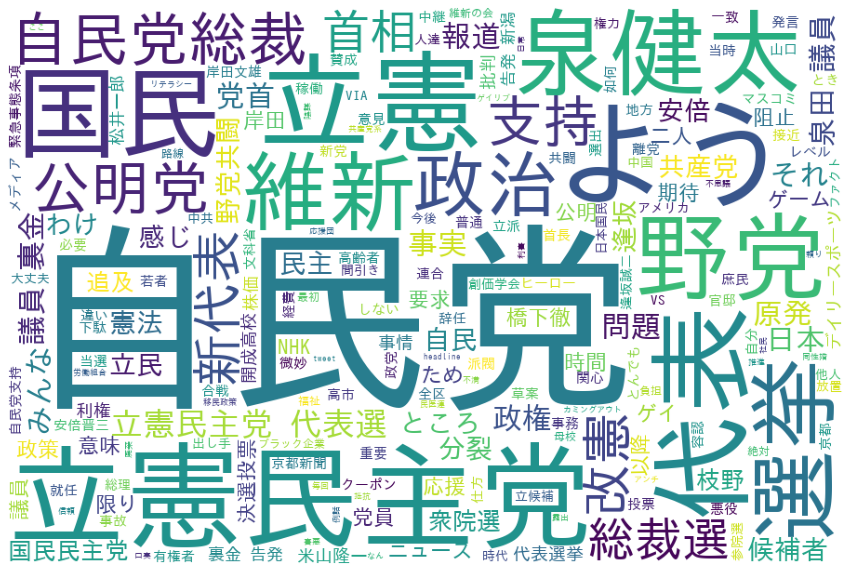

In [455]:
#--> NG„ÉØ„Éº„Éâ„ÅÆÈßÜÈÄêÂæå„ÅÆ„ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ
#----> „ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„ÅÆË°®Á§∫ÂÜÖÂÆπ„Çà„Åè„Å™„Çã„ÅØ„ÅöÔºÅ

# WordCloud„ÅßÂá∫Âäõ„Åô„Çã„Éï„Ç©„É≥„Éà„ÇíÊåáÂÆö
font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"

# „Çπ„Éà„ÉÉ„Éó„ÉØ„Éº„Éâ„ÅÆË®≠ÂÆö„ÄÄ‚Äª„Åì„Çå„ÅØÊ§úÁ¥¢„Ç≠„Éº„ÉØ„Éº„Éâ„Å´„Çà„Å£„Å¶Èô§Â§ñ„Åó„Åü„Åª„ÅÜ„Åå„ÅÑ„ÅÑÂçòË™û„ÇíË®≠ÂÆö
stop_words = [ '„Åø„Åü„ÅÑ','„ÇÇ„ÅÆ' ,'„Åì„Å®','„Å™„ÅÆ„Åã','„ÅÇ„Çå', '„ÅÇ', '„Å®„Åã']

#Ëß£ÊûêÂçòË™û„ÅÆÊåáÂÆö„ÄÅ„Çπ„Éà„ÉÉ„Éó„ÉØ„Éº„Éâ„ÅÆË®≠ÂÆö„ÄÅËÉåÊôØËâ≤„ÅØÁôΩ
wordcloud = WordCloud(background_color="white", font_path=font_path, stopwords=set(stop_words),width=900,height=600).generate(words_text2)

# „ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„ÇíË°®Á§∫
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## ‚ë¶ ÂÖ±Ëµ∑„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆ‰ΩúÊàê

### 7-0. ÂÖ±Ëµ∑„Éá„Éº„Çø„ÅÆ‰ΩúÊàê

In [481]:
# Mecab„Çí‰ΩøÁî®„Åó„Å¶„ÄÅÂΩ¢ÊÖãÁ¥†Ëß£Êûê
import MeCab

# ÂΩ¢ÊÖãÁ¥†Ëß£ÊûêÂô®: ChaSen„ÄÅËæûÊõ∏: Êñ∞Ë™ûÂØæÂøú„ÅßÊúâÂêç„Å™Neologd
# mecab = MeCab.Tagger("-Ochasen")
mecab =MeCab.Tagger('-Ochasen -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')

In [ ]:
# ÊñáÂçò‰Ωç„ÅÆÂêçË©û„É™„Çπ„Éà
words_list=[]

# ÊñáÂçò‰Ωç„ÅÆÂêçË©û„É™„Çπ„Éà„ÇíÁîüÊàê
for sentence in tw_data:
    # print(mecab.parse(sentence))
    # print(mecab.parse(sentence).splitlines())

    sw_list = []
    for v in mecab.parse(sentence).splitlines():
        # print(v.split())
        if (len(v.split())>=3 and v.split()[3][:2]=='ÂêçË©û'):
            sw_list.append(v.split()[2])
            # print(sw_list)
            
    words_list.append(sw_list)

In [482]:
# ÂΩ¢ÊÖãÁ¥†Ëß£Êûê„ÅÆÁµêÊûú„Å®„Åó„Å¶„ÄÅÂèñÂæó„Åó„Åü„ÄåÊñáÂçò‰Ωç„ÅÆÂêçË©û„É™„Çπ„Éà„Äç„ÇíÁ¢∫Ë™ç
print(words_list)

[['Ê∞ëÂåªÈÄ£', 'ÂÖ±Áî£ÂÖöÁ≥ª', 'ÁßªÊ∞ëÊîøÁ≠ñ', 'Êé®ÈÄ≤', 'Ëá™Ê∞ëÂÖö', 'ÂÖ±Áî£ÂÖö', 'Âà©ÂÆ≥', '‰∏ÄËá¥'], ['„Ç≤„Ç§', '„Åø„Çì„Å™', 'ÂêåÊÄßÂ©ö', '„Çè„Åë', '‰∫ãÂÆü', '„Ç≤„Ç§', '„Åø„Çì„Å™', '„Ç´„Éü„É≥„Ç∞„Ç¢„Ç¶„Éà', '„Çè„Åë', '‰∫ãÂÆü', '„Ç≤„Ç§', 'Ëá™Ê∞ëÂÖöÊîØÊåÅ', 'ËÄÖ', '‰∫ãÂÆü', '‰∫ãÂÆü', '„Ç≤„Ç§„É™„Éñ', '„Ç¢„É≥„ÉÅ', 'Âòò', 'Èô∞Ë¨Ä', 'Ë´ñ', 'tweet', '„ÅÆ'], ['Êó•Â∏∏', 'Á∂≠Êñ∞', 'ÂÆ≥ÊÇ™', '‰ø°È†º', '‰ªä', 'È†º„Çä', 'Ëá™Ê∞ëÂÖö', 'Á∂≠Êñ∞', 'ÊäµÊäó', 'Á§æÊ∞ë', '‰æãË©±', 'ÂøúÊè¥'], ['ÈÅ∏Êåô', 'ÊØéÂõû', 'ÊîøÊ≤ª', '„Éã„É•„Éº„Çπ', 'headline', 'ÊîøÊ®©', '‰∏çÊ∫Ä', 'Ëá™Ê∞ëÂÖö', '1', 'Âº∑', 'ÂæÆÂ¶ô', '„É™„ÉÜ„É©„Ç∑„Éº', '„É¨„Éô„É´', 'Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 'ÂÖöÈ¶ñ', 'ÈÅ∏'], ['Âä¥ÂÉçÁµÑÂêà', 'ÈÄ£Âêà', '„Åì„Åì', 'ÊîøÊ≤ª', 'Âè£', '„ÅÆ', '„Å™„Çì', 'ÈÄ£Âêà', 'Ëá™Ê∞ëÂÖö', 'ÂøúÊè¥Âõ£', '„ÅÆ', '‰∏çÊÄùË≠∞', 'ÂÖ±Áî£ÂÖö', '„ÅÆ', 'Âè£ÂÆü', 'ÂéüÁô∫', 'ÂªÉÊ£Ñ', 'ÂéüÁô∫', 'VS', 'ÂéüÁô∫', 'Êùë', 'Ëá™Ê∞ë', 'Ë≤°'], ['Ëá™Ê∞ëÂÖö', 'ÁµÑ', 'Èô∞'], ['Ëá™Ê∞ëÂÖö', '„Å®„Åì„Çç', '„Éí„Éº„É≠„Éº', 'ÊÇ™ÂΩπ', '„Åì„Å®', 'Ë°®', '„Éí„Éº„É≠„Éº

### 7-1. ÂÖ±Ëµ∑„Éá„Éº„Çø„ÅÆÁîüÊàê

ÂÖ±Ëµ∑„Éá„Éº„Çø:  ÂÖ±Ëµ∑ÂçòË™û„ÅÆ„Éö„Ç¢„Å®Âá∫ÁèæÈ†ªÂ∫¶„Åã„Çâ„Å™„ÇãËæûÊõ∏Âûã„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà

‚ÄªÂÖ±Ëµ∑: ÂØæË±°„Å®„Åô„ÇãÂçò‰ΩçÔºàÊñáÔºâ„ÅÆ‰∏≠„ÅßÂçòË™û„ÅåÂÖ±„Å´Âá∫Áèæ„Åô„ÇãÂõûÊï∞„Çí„Ç´„Ç¶„É≥„Éà

In [483]:
import itertools

In [525]:
# ÈÅ©„Åï„Å™„ÅÑÂçòË™û„Çí„É™„Çπ„Éà„Åã„Çâ„Ç´„ÉÉ„ÉàÔºàNG„ÉØ„Éº„Éâ„ÅÆÈßÜÈÄêÔºâ
words_list2 = []

for s in words_list:
    w_list2 = []
    for w in s:
        # ‚òÖWordCloud‰ΩúÊàêÊôÇ„Å´„ÉÅ„Çß„ÉÉ„ÇØ„Åó„ÅüNG„ÉØ„Éº„Éâ„ÇíË®òËø∞
        if w not in ['„ÅÆ', '„Çì', '„Åì„Çå', '„Åï„Çì', '„Åø„Åü„ÅÑ','„ÇÇ„ÅÆ' ,'„Åì„Å®','„Å™„ÅÆ„Åã','„ÅÇ„Çå', '„ÅÇ', '„Å®„Åã']:
            w_list2.append(w)
    words_list2.append(w_list2)

print(words_list2)

[['Ê∞ëÂåªÈÄ£', 'ÂÖ±Áî£ÂÖöÁ≥ª', 'ÁßªÊ∞ëÊîøÁ≠ñ', 'Êé®ÈÄ≤', 'Ëá™Ê∞ëÂÖö', 'ÂÖ±Áî£ÂÖö', 'Âà©ÂÆ≥', '‰∏ÄËá¥'], ['„Ç≤„Ç§', '„Åø„Çì„Å™', 'ÂêåÊÄßÂ©ö', '„Çè„Åë', '‰∫ãÂÆü', '„Ç≤„Ç§', '„Åø„Çì„Å™', '„Ç´„Éü„É≥„Ç∞„Ç¢„Ç¶„Éà', '„Çè„Åë', '‰∫ãÂÆü', '„Ç≤„Ç§', 'Ëá™Ê∞ëÂÖöÊîØÊåÅ', 'ËÄÖ', '‰∫ãÂÆü', '‰∫ãÂÆü', '„Ç≤„Ç§„É™„Éñ', '„Ç¢„É≥„ÉÅ', 'Âòò', 'Èô∞Ë¨Ä', 'Ë´ñ', 'tweet'], ['Êó•Â∏∏', 'Á∂≠Êñ∞', 'ÂÆ≥ÊÇ™', '‰ø°È†º', '‰ªä', 'È†º„Çä', 'Ëá™Ê∞ëÂÖö', 'Á∂≠Êñ∞', 'ÊäµÊäó', 'Á§æÊ∞ë', '‰æãË©±', 'ÂøúÊè¥'], ['ÈÅ∏Êåô', 'ÊØéÂõû', 'ÊîøÊ≤ª', '„Éã„É•„Éº„Çπ', 'headline', 'ÊîøÊ®©', '‰∏çÊ∫Ä', 'Ëá™Ê∞ëÂÖö', '1', 'Âº∑', 'ÂæÆÂ¶ô', '„É™„ÉÜ„É©„Ç∑„Éº', '„É¨„Éô„É´', 'Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 'ÂÖöÈ¶ñ', 'ÈÅ∏'], ['Âä¥ÂÉçÁµÑÂêà', 'ÈÄ£Âêà', '„Åì„Åì', 'ÊîøÊ≤ª', 'Âè£', '„Å™„Çì', 'ÈÄ£Âêà', 'Ëá™Ê∞ëÂÖö', 'ÂøúÊè¥Âõ£', '‰∏çÊÄùË≠∞', 'ÂÖ±Áî£ÂÖö', 'Âè£ÂÆü', 'ÂéüÁô∫', 'ÂªÉÊ£Ñ', 'ÂéüÁô∫', 'VS', 'ÂéüÁô∫', 'Êùë', 'Ëá™Ê∞ë', 'Ë≤°'], ['Ëá™Ê∞ëÂÖö', 'ÁµÑ', 'Èô∞'], ['Ëá™Ê∞ëÂÖö', '„Å®„Åì„Çç', '„Éí„Éº„É≠„Éº', 'ÊÇ™ÂΩπ', 'Ë°®', '„Éí„Éº„É≠„Éº', '„É°„Éá„Ç£„Ç¢', 'Èú≤Âá∫', '‰∏ÄÊûöÂ≤

In [526]:
# ÊñáÂçò‰Ωç„ÅÆ ÂêçË©û„Éö„Ç¢„É™„Çπ„Éà
pair_list = []

# ‚òÖÊñáÂçò‰Ωç„ÅÆÂêçË©û„Éö„Ç¢„É™„Çπ„Éà„ÇíÁîüÊàê
#--> Èö£„ÇäÂêà„Å£„ÅüÂçòË™û„ÅÆÁµÑ„Çí„Éá„Éº„Çø„ÅÆÂçò‰ΩçÔºà2-gram(2ÂçòË™û)Ôºâ
for n in words_list2:
    # print(n, len(n))
    if len(n) >=2:
        pair_list.append(list(itertools.combinations(n, 2)))

In [527]:
print(pair_list)

[[('Ê∞ëÂåªÈÄ£', 'ÂÖ±Áî£ÂÖöÁ≥ª'), ('Ê∞ëÂåªÈÄ£', 'ÁßªÊ∞ëÊîøÁ≠ñ'), ('Ê∞ëÂåªÈÄ£', 'Êé®ÈÄ≤'), ('Ê∞ëÂåªÈÄ£', 'Ëá™Ê∞ëÂÖö'), ('Ê∞ëÂåªÈÄ£', 'ÂÖ±Áî£ÂÖö'), ('Ê∞ëÂåªÈÄ£', 'Âà©ÂÆ≥'), ('Ê∞ëÂåªÈÄ£', '‰∏ÄËá¥'), ('ÂÖ±Áî£ÂÖöÁ≥ª', 'ÁßªÊ∞ëÊîøÁ≠ñ'), ('ÂÖ±Áî£ÂÖöÁ≥ª', 'Êé®ÈÄ≤'), ('ÂÖ±Áî£ÂÖöÁ≥ª', 'Ëá™Ê∞ëÂÖö'), ('ÂÖ±Áî£ÂÖöÁ≥ª', 'ÂÖ±Áî£ÂÖö'), ('ÂÖ±Áî£ÂÖöÁ≥ª', 'Âà©ÂÆ≥'), ('ÂÖ±Áî£ÂÖöÁ≥ª', '‰∏ÄËá¥'), ('ÁßªÊ∞ëÊîøÁ≠ñ', 'Êé®ÈÄ≤'), ('ÁßªÊ∞ëÊîøÁ≠ñ', 'Ëá™Ê∞ëÂÖö'), ('ÁßªÊ∞ëÊîøÁ≠ñ', 'ÂÖ±Áî£ÂÖö'), ('ÁßªÊ∞ëÊîøÁ≠ñ', 'Âà©ÂÆ≥'), ('ÁßªÊ∞ëÊîøÁ≠ñ', '‰∏ÄËá¥'), ('Êé®ÈÄ≤', 'Ëá™Ê∞ëÂÖö'), ('Êé®ÈÄ≤', 'ÂÖ±Áî£ÂÖö'), ('Êé®ÈÄ≤', 'Âà©ÂÆ≥'), ('Êé®ÈÄ≤', '‰∏ÄËá¥'), ('Ëá™Ê∞ëÂÖö', 'ÂÖ±Áî£ÂÖö'), ('Ëá™Ê∞ëÂÖö', 'Âà©ÂÆ≥'), ('Ëá™Ê∞ëÂÖö', '‰∏ÄËá¥'), ('ÂÖ±Áî£ÂÖö', 'Âà©ÂÆ≥'), ('ÂÖ±Áî£ÂÖö', '‰∏ÄËá¥'), ('Âà©ÂÆ≥', '‰∏ÄËá¥')], [('„Ç≤„Ç§', '„Åø„Çì„Å™'), ('„Ç≤„Ç§', 'ÂêåÊÄßÂ©ö'), ('„Ç≤„Ç§', '„Çè„Åë'), ('„Ç≤„Ç§', '‰∫ãÂÆü'), ('„Ç≤„Ç§', '„Ç≤„Ç§'), ('„Ç≤„Ç§', '„Åø„Çì„Å™'), ('„Ç≤„Ç§', '„Ç´„Éü„É≥„Ç∞„Ç¢„Ç¶„Éà'), ('„Ç≤„Ç§', '„Çè„Åë'), ('„Ç≤„Ç§', '‰∫ãÂÆü'), ('„Ç≤„Ç§', 

In [528]:
# ÂêçË©û„Éö„Ç¢„É™„Çπ„Éà„ÅÆÂπ≥Âù¶Âåñ
all_pairs = []

for u in pair_list:
    all_pairs.extend(u)

In [529]:
# ÂêçË©û„Éö„Ç¢„ÅÆÈ†ªÂ∫¶„Çí„Ç´„Ç¶„É≥„Éà
cnt_pairs = Counter(all_pairs)
print(cnt_pairs)

Counter({('Ëá™Ê∞ëÂÖö', 'Ê∞è'): 10, ('Ë≠∞Âì°', 'Ë£èÈáë'): 10, ('„Ç≤„Ç§', '‰∫ãÂÆü'): 9, ('ÈÅ∏Êåô', 'Ëá™Ê∞ëÂÖö'): 9, ('Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 'Ê∞è'): 9, ('Ê≥âÂÅ•Â§™', 'Ê∞è'): 9, ('Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 'Ëá™Ê∞ëÂÖö'): 8, ('„Åø„Çì„Å™', '‰∫ãÂÆü'): 7, ('„Çè„Åë', '‰∫ãÂÆü'): 7, ('Á´ãÊÜ≤', 'Ëá™Ê∞ëÂÖö'): 7, ('ÂõΩÊ∞ë', 'Ëá™Ê∞ëÂÖö'): 7, ('Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', '‰ª£Ë°®ÈÅ∏'): 7, ('Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', '„Çà„ÅÜ'): 7, ('Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', '‰ª£Ë°®'): 7, ('Ê∞è', 'Ê∞è'): 7, ('‰ª£Ë°®', 'Ëá™Ê∞ëÂÖö'): 7, ('Ê∞è', 'Ëá™Ê∞ëÂÖö'): 7, ('Ë≠∞Âì°', 'Ëá™Ê∞ëÂÖö'): 7, ('ÈáéÂÖö', 'Ëá™Ê∞ëÂÖö'): 7, ('‰∫ãÂÆü', '‰∫ãÂÆü'): 6, ('Ëá™Ê∞ëÂÖö', 'Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö'): 6, ('ÈÄ£Âêà', 'ÂéüÁô∫'): 6, ('ÈÅ∏Êåô', 'ÈÅ∏Êåô'): 6, ('Ëá™Ê∞ëÂÖö', 'Ëá™Ê∞ëÂÖö'): 6, ('Ëá™Ê∞ëÂÖöÁ∑èË£Å', 'ÈÅ∏'): 6, ('Êñ∞‰ª£Ë°®', 'Ê∞è'): 6, ('Ê≥â', 'Ê∞è'): 6, ('Ê≥âÂÅ•Â§™', 'Ëá™Ê∞ëÂÖö'): 6, ('Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 'Ê≥âÂÅ•Â§™'): 6, ('„Çà„ÅÜ', 'Ëá™Ê∞ëÂÖö'): 6, ('ÂçÉ', '‰∏á'): 6, ('Ê≥âÁî∞', 'Ë£èÈáë'): 6, ('Á±≥Â±±ÈöÜ‰∏Ä', 'Ë≠∞Âì°'): 6, ('Ë≠∞Âì°', 'ÂëäÁô∫'): 6, ('Ë≠∞Âì°', 'Êñ∞ÊΩü'): 6, ('Ë≠∞Âì°', '

### 7-2. „Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÂõ≥Áî®„Éá„Éº„Çø„ÅÆ‰ΩúÊàê

In [530]:
import numpy as np

In [531]:
# ‰ΩúÂõ≥„Å´„ÅÇ„Åü„Å£„Å¶Ë¶ã„ÅüÁõÆ„ÇíÁ∞°ÊΩî„Å´„Åô„Çã„Åü„ÇÅ„Å´Ë¶ÅÁ¥†„ÇíÁµû„ÇäËæº„ÇÄ
#--> Âá∫ÁèæÈ†ªÂ∫¶„Åß‰∏ä‰Ωç50ÁµÑ„ÅÆ„É™„Çπ„Éà„ÇíÁîüÊàê
tops = sorted(cnt_pairs.items(), key=lambda x: x[1], reverse=True)[:50]
tops

[(('Ëá™Ê∞ëÂÖö', 'Ê∞è'), 10),
 (('Ë≠∞Âì°', 'Ë£èÈáë'), 10),
 (('„Ç≤„Ç§', '‰∫ãÂÆü'), 9),
 (('ÈÅ∏Êåô', 'Ëá™Ê∞ëÂÖö'), 9),
 (('Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 'Ê∞è'), 9),
 (('Ê≥âÂÅ•Â§™', 'Ê∞è'), 9),
 (('Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 'Ëá™Ê∞ëÂÖö'), 8),
 (('„Åø„Çì„Å™', '‰∫ãÂÆü'), 7),
 (('„Çè„Åë', '‰∫ãÂÆü'), 7),
 (('Á´ãÊÜ≤', 'Ëá™Ê∞ëÂÖö'), 7),
 (('ÂõΩÊ∞ë', 'Ëá™Ê∞ëÂÖö'), 7),
 (('Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', '‰ª£Ë°®ÈÅ∏'), 7),
 (('Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', '„Çà„ÅÜ'), 7),
 (('Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', '‰ª£Ë°®'), 7),
 (('Ê∞è', 'Ê∞è'), 7),
 (('‰ª£Ë°®', 'Ëá™Ê∞ëÂÖö'), 7),
 (('Ê∞è', 'Ëá™Ê∞ëÂÖö'), 7),
 (('Ë≠∞Âì°', 'Ëá™Ê∞ëÂÖö'), 7),
 (('ÈáéÂÖö', 'Ëá™Ê∞ëÂÖö'), 7),
 (('‰∫ãÂÆü', '‰∫ãÂÆü'), 6),
 (('Ëá™Ê∞ëÂÖö', 'Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö'), 6),
 (('ÈÄ£Âêà', 'ÂéüÁô∫'), 6),
 (('ÈÅ∏Êåô', 'ÈÅ∏Êåô'), 6),
 (('Ëá™Ê∞ëÂÖö', 'Ëá™Ê∞ëÂÖö'), 6),
 (('Ëá™Ê∞ëÂÖöÁ∑èË£Å', 'ÈÅ∏'), 6),
 (('Êñ∞‰ª£Ë°®', 'Ê∞è'), 6),
 (('Ê≥â', 'Ê∞è'), 6),
 (('Ê≥âÂÅ•Â§™', 'Ëá™Ê∞ëÂÖö'), 6),
 (('Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 'Ê≥âÂÅ•Â§™'), 6),
 (('„Çà„ÅÜ', 'Ëá™Ê∞ëÂÖö'), 6),
 (('ÂçÉ', '‰∏á'), 6),
 (('Ê≥âÁî∞', 'Ë£èÈáë'), 6),
 (('Á±

In [532]:
noun_1 = []
noun_2 = []
frequency = []

# Èáç„Åø‰ªò„Åç„Éá„Éº„Çø„ÅÆÁîüÊàê
for n,f in tops:
    noun_1.append(n[0])    
    noun_2.append(n[1])
    frequency.append(f)

# „Éá„Éº„Çø„Éï„É¨„Éº„É†„ÅÆ‰ΩúÊàê
df = pd.DataFrame({'ÂâçÂá∫ÂêçË©û': noun_1, 'ÂæåÂá∫ÂêçË©û': noun_2, 'Âá∫ÁèæÈ†ªÂ∫¶': frequency})

# Èáç„Åø‰ªò„Åç„Éá„Éº„Çø„ÅÆË®≠ÂÆöÔºàPandas‚ÜíArrayÂ§âÊèõÔºâ
weighted_edges = np.array(df)
weighted_edges

array([['Ëá™Ê∞ëÂÖö', 'Ê∞è', 10],
       ['Ë≠∞Âì°', 'Ë£èÈáë', 10],
       ['„Ç≤„Ç§', '‰∫ãÂÆü', 9],
       ['ÈÅ∏Êåô', 'Ëá™Ê∞ëÂÖö', 9],
       ['Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 'Ê∞è', 9],
       ['Ê≥âÂÅ•Â§™', 'Ê∞è', 9],
       ['Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 'Ëá™Ê∞ëÂÖö', 8],
       ['„Åø„Çì„Å™', '‰∫ãÂÆü', 7],
       ['„Çè„Åë', '‰∫ãÂÆü', 7],
       ['Á´ãÊÜ≤', 'Ëá™Ê∞ëÂÖö', 7],
       ['ÂõΩÊ∞ë', 'Ëá™Ê∞ëÂÖö', 7],
       ['Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', '‰ª£Ë°®ÈÅ∏', 7],
       ['Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', '„Çà„ÅÜ', 7],
       ['Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', '‰ª£Ë°®', 7],
       ['Ê∞è', 'Ê∞è', 7],
       ['‰ª£Ë°®', 'Ëá™Ê∞ëÂÖö', 7],
       ['Ê∞è', 'Ëá™Ê∞ëÂÖö', 7],
       ['Ë≠∞Âì°', 'Ëá™Ê∞ëÂÖö', 7],
       ['ÈáéÂÖö', 'Ëá™Ê∞ëÂÖö', 7],
       ['‰∫ãÂÆü', '‰∫ãÂÆü', 6],
       ['Ëá™Ê∞ëÂÖö', 'Á´ãÊÜ≤Ê∞ë‰∏ªÂÖö', 6],
       ['ÈÄ£Âêà', 'ÂéüÁô∫', 6],
       ['ÈÅ∏Êåô', 'ÈÅ∏Êåô', 6],
       ['Ëá™Ê∞ëÂÖö', 'Ëá™Ê∞ëÂÖö', 6],
       ['Ëá™Ê∞ëÂÖöÁ∑èË£Å', 'ÈÅ∏', 6],
       ['Êñ∞‰ª£Ë°®', 'Ê∞è', 6],
       ['Ê≥â', 'Ê∞è', 6],
       ['Ê≥âÂÅ•Â§™', 'Ëá™Ê∞ëÂÖö', 6],
       ['Á´ãÊÜ≤

### 7-3. „Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÂõ≥„ÅÆÊèèÁîª

In [533]:
# ÂèØË¶ñÂåñ„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
# NetworkX:  Python„ÅßË§áÈõë„Å™„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇÑ„Ç∞„É©„ÉïÊßãÈÄ†„Çí‰ΩúÊàê„ÉªÊìç‰Ωú„Åô„Çã„Åü„ÇÅ„ÅÆ„Éë„ÉÉ„Ç±„Éº„Ç∏
# --> „Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÂõ≥:  È†ÇÁÇπ„ÅÆ„Åì„Å®„Çí„Éé„Éº„Éâ(node)„ÄÅÈ†ÇÁÇπÂêåÂ£´„ÇíÈÄ£Áµê„Åô„ÇãËæ∫„Çí„Ç®„ÉÉ„Ç∏(edge)
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline 

In [534]:
# matplotlib„ÇíÊó•Êú¨Ë™ûË°®Á§∫„Å´ÂØæÂøú„Åï„Åõ„Çã„É¢„Ç∏„É•„Éº„É´
# „Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÂõ≥„ÅÆ„Éé„Éº„Éâ„ÅÆ„É©„Éô„É´„ÇíÊó•Êú¨Ë™û„ÅßË°®Á§∫„Åô„Çã„Åü„ÇÅ„Å´ÂøÖË¶ÅÔºà„Åï„Çâ„Å´Êó•Êú¨Ë™û„Éï„Ç©„É≥„Éà„ÇíÊåáÂÆö„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„ÇäÔºâ
!pip install japanize_matplotlib 
import japanize_matplotlib

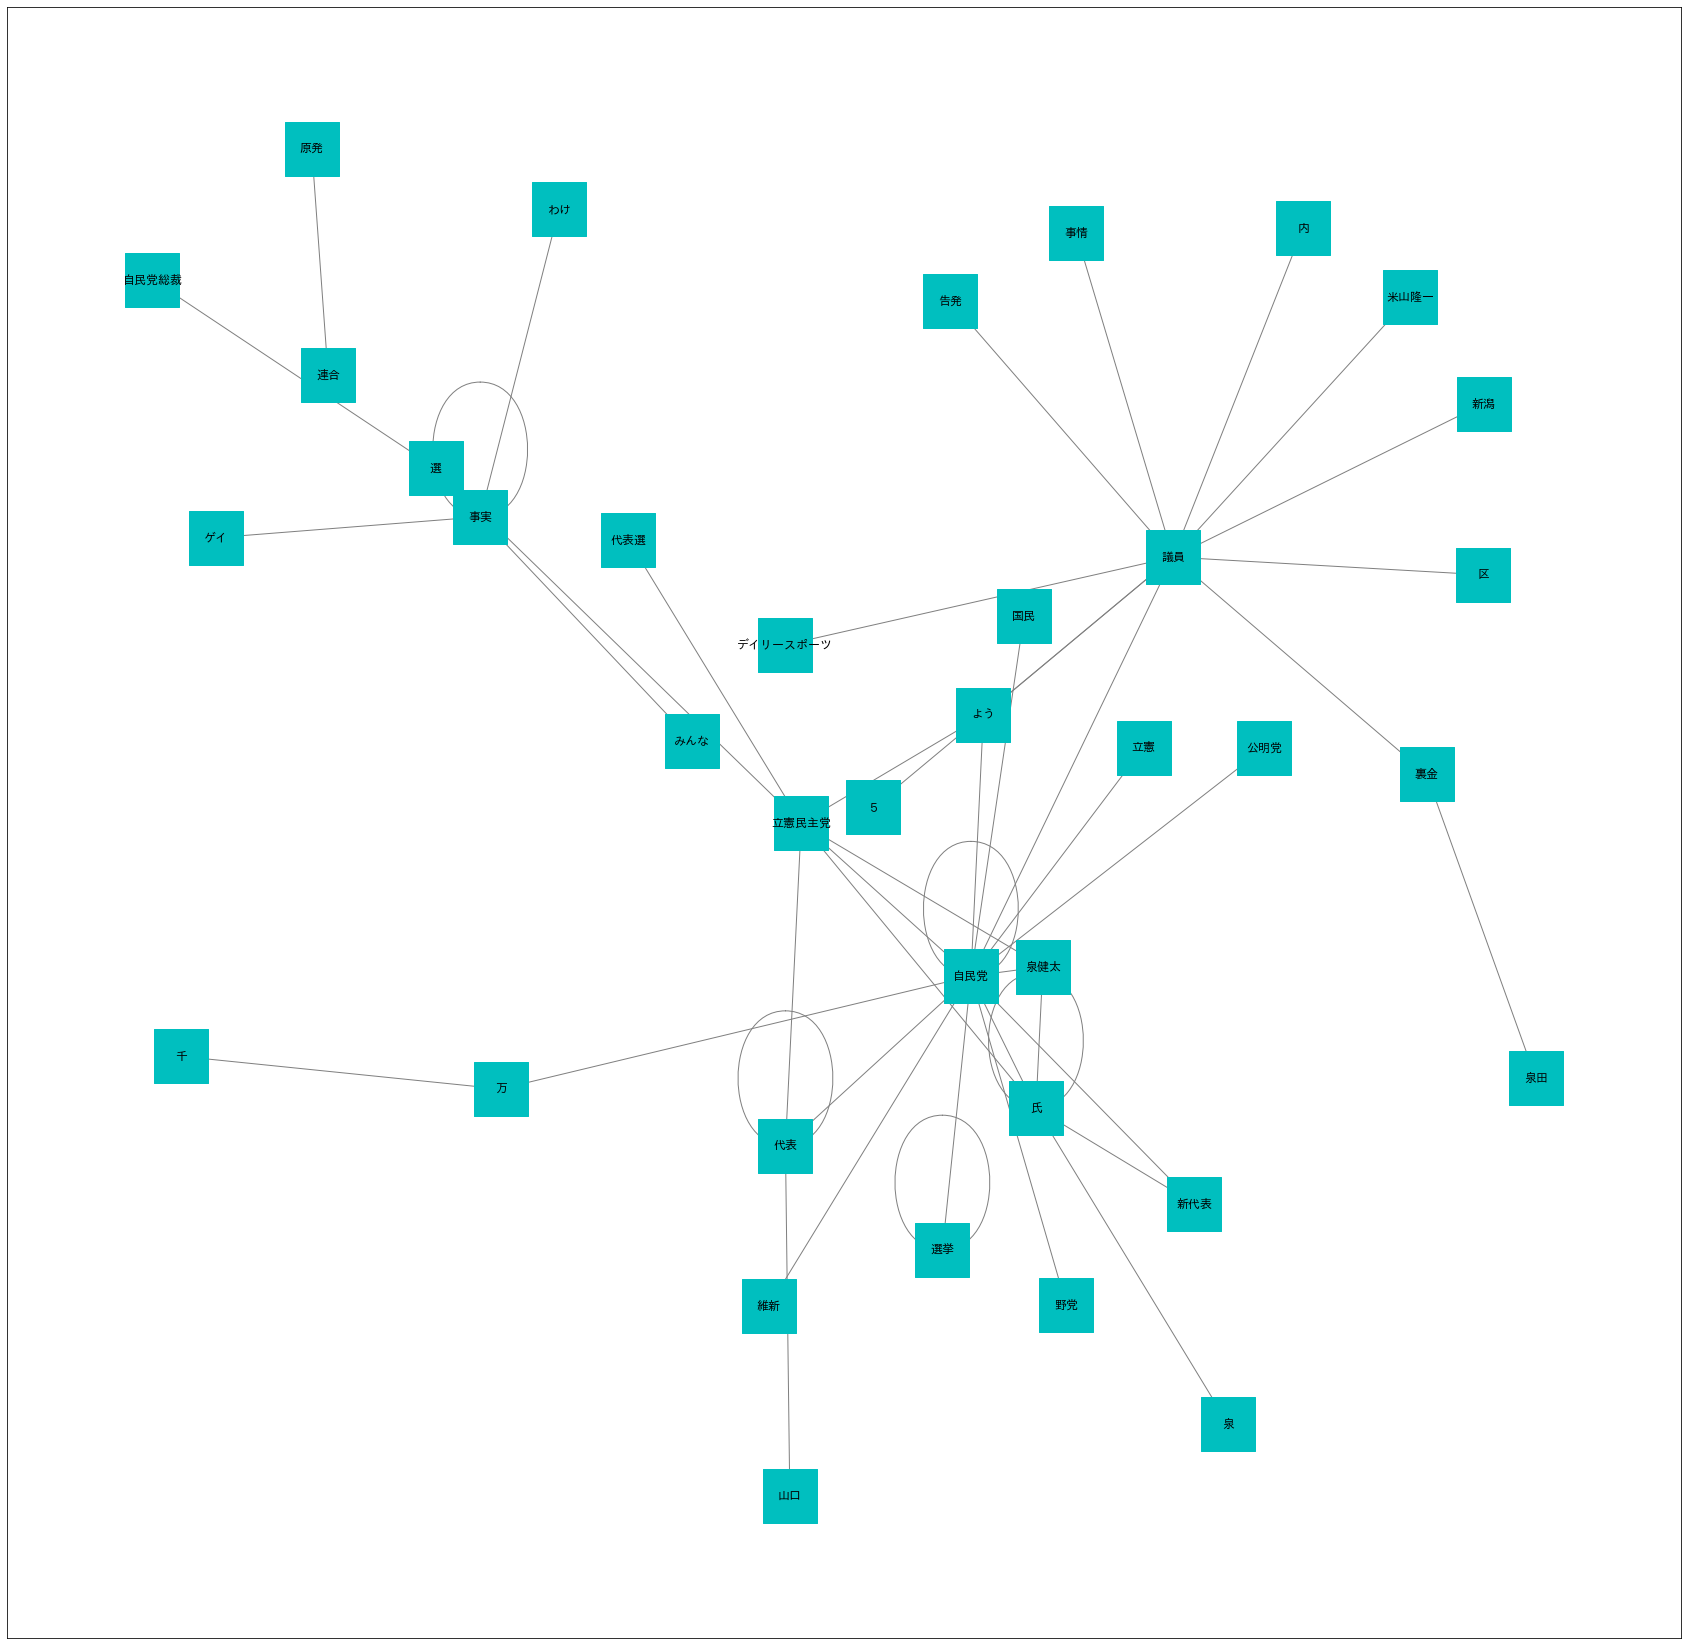

In [536]:
# NetworkX„Åß„ÅÆÂèØË¶ñÂåñ
# „Ç∞„É©„Éï„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà„ÅÆÁîüÊàê
G = nx.Graph()

# Èáç„Åø‰ªò„Åç„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø
G.add_weighted_edges_from(weighted_edges)

# „Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÂõ≥„ÅÆÊèèÁîª
plt.figure(figsize=(30,30))

#Âõ≥„ÅÆ„É¨„Ç§„Ç¢„Ç¶„Éà„ÇíÊ±∫„ÇÅ„Çã„ÄÇk„ÅÆÂÄ§„ÅåÂ∞è„Åï„ÅÑÁ®ãÂõ≥„ÅåÂØÜÈõÜ„Åô„Çã
pos = nx.spring_layout(G, k=0.9)

nx.draw_networkx(G,
                 pos,
                 with_labels = True, 
                 node_shape = "s",
                 node_color = "c", 
                 node_size = 3000,
                 edge_color = "gray", 
                 font_family = "IPAexGothic") # „Éï„Ç©„É≥„ÉàÊåáÂÆö

plt.show()